In [1]:
"""
В ноутбуке представлен анализ переменных сгенерированных для таблицы ЦК
"""

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('..'))
from data.preprocessing import Preprocessor
from data.feature_generation import spec_agg_features

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
preprocessor = Preprocessor()
spec = preprocessor.spec_preprocessing()
zpp4 = preprocessor.zpp4_preprocessing()

Duplicate rows cleaning: 620it [00:02, 281.94it/s]


In [3]:
spec = spec_agg_features(spec)

In [4]:
spec.head(2)

,supplier,supplier_status,spec_date,delivery_period_end,option,declared_price,consent_price,spec_price,volume_requested,volume_contracted,bids_submitted,bids_contracted,id,delivery_length,mean_delivery_length,delivery_length_diff,mean_volume,volume_diff,conversion
0,50 ЛЕТ ОКТЯБРЯ ООО,1.0,2022-12-19,2022-12-25,15.0,25.5,25.0,25.0,40.0,60.0,1.0,1.0,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2022-12-19",6,NaN,NaN,NaN,NaN,NaN
1,50 ЛЕТ ОКТЯБРЯ ООО,1.0,2023-01-24,2023-02-12,15.0,27.5,27.5,27.5,50.0,59.0,1.0,1.0,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-01-24",19,6.0,13.0,40.0,10.0,1.0


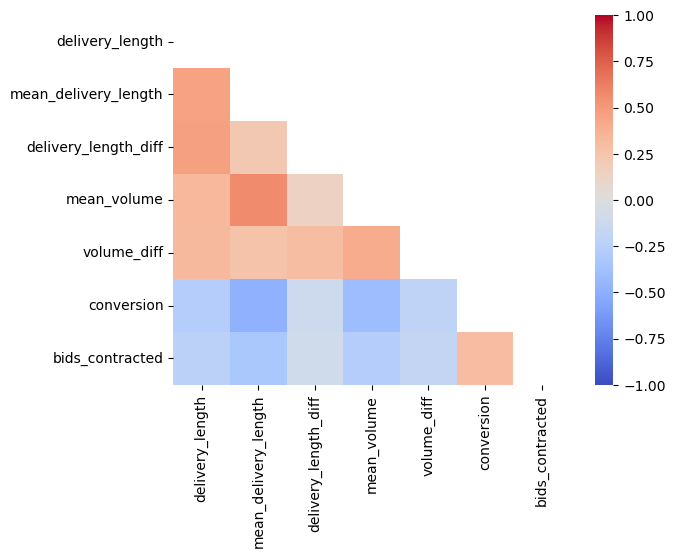

In [10]:
cols = ['delivery_length', 'mean_delivery_length', 'delivery_length_diff',
        'mean_volume', 'volume_diff', 'conversion', 'bids_contracted']
shape_plot = len(cols)
mask = np.zeros((shape_plot, shape_plot))
mask[np.triu_indices_from(mask)] = True

sns.heatmap(spec[cols].corr(), cmap = 'coolwarm', annot = False, 
            mask=mask, vmin=-1, vmax=1)
plt.savefig('../figures/correlation_matrix.jpg', bbox_inches='tight')
# plt.show()